In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format='retina'
#ref: 

General solution +  boundary condition/particular solution = complete solution/ descripton of the behavior of the stystem over time



explicit solution/close form

nonlinear system

numerical solution 





## 1.3 Autonomous systems

time does not enter as a saparate argument in f 



solution sequence by iterations.

transition function : the flow of the system


positive orbit


negative orbit


analytical and graphical techniques

qualitative behavior of the system.


bifurcation points


phase diagram convenient device 

vector field $\delta x = d(x,t)$




asymptotic or long-run behavior



## 1.4 steady states, periodic equilibria ,and  stablility





stationary states or fixed points of nonlinear autonomous dynamical systems

1. stable, Liapunov stable

2. asmptotoically stable 

  a. basin of attraction or region of asymptotic stablility of $\bar x$
  
  b. globally asymptotically stable











# chapter 2 scalar linear equations


A first-order linear difference equation

$$x_{t+1} = a_t x_t + b_t$$


The generel solution:
    
$$x_t^g = x_t^c + x_t^p$$


1. complementatry function $x_t^c$ is general sulution to the corresponding homogeneous equation 
$$x_{t+1} = a_t x_t$$.

2. $x_t^p$ is any particular solution to the full non-homogeneous equation. 

## 2.1 homogeneous equation 

### Phase diagram 

### An exact solution

general solution for homogenous equation:
    
    
$$x_t = c a^t$$


Boundary conditions allow us to determine the appropriate value fo the arbitray constant c in the general solution.

## 2.2 Autonomous equations. 

A natural candidate for the role of the particular solution is a constant solution $x_t = \bar x$.

steady state or staionary solution.

$$x_t^p =  \bar x = b/(1-a)$$

The generel solution for non-homegenous equation:
    
$$x_t^g = x_t^c + x_t^p = \bar x + c a^t$$



With boundary condition: $x_0 = \bar x + c$
    
$$c = x_0 - \bar x$$

and then 

$$x_t - \bar x = (x_0 - \bar x) a^t$$



1. start at $x_0 = \bar x $, stay at steady state.

2. start at $x_0 \ne \bar x $, 

    a. $|a| < 1$,converg,
    
    b. $|a| > 1$,diverge.
    
    
For $a = 1$,

$$x_t = x_0 + bt $$

In [2]:
def subplots(fs):
    "Custom subplots with axes throught the origin"
    fig, ax = plt.subplots(figsize=fs)

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
        ax.spines[spine].set_color('green')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    return fig, ax

In [3]:
def plot45(g, xmin, xmax, x0, num_arrows, var='x', show_num=3):

    xgrid = np.linspace(xmin, xmax, 200)

    fig, ax = subplots((6.5, 6))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)

    hw = (xmax - xmin) * 0.01
    hl = 2 * hw
    arrow_args = dict(fc="k", ec="k", head_width=hw, 
            length_includes_head=True, lw=1,
            alpha=0.6, head_length=hl)

    ax.plot(xgrid, g(xgrid), 'b-', lw=2, alpha=0.6, label='g')
    ax.plot(xgrid, xgrid, 'k-', lw=1, alpha=0.7, label='45')

    x = x0
    xticks = [xmin]
    xtick_labels = [xmin]
    for i in range(num_arrows):
        if i == 0:
            ax.arrow(x, 0.0, 0.0, g(x), **arrow_args) # x, y, dx, dy
        else:
            ax.arrow(x, x, 0.0, g(x) - x, **arrow_args) 
            if i < show_num:
                ax.plot((x, x), (0, x), 'k', ls='dotted')
        ax.arrow(x, g(x), g(x) - x, 0, **arrow_args)
        if i < show_num:
            xticks.append(x)
            xtick_labels.append(r'${}_{}$'.format(var, str(i)))
        x = g(x)
    if i < show_num:
        xticks.append(x)
        xtick_labels.append(r'${}_{}$'.format(var, str(i+1)))
        ax.plot((x, x), (0, x), 'k-', ls='dotted')

    xticks.append(xmax)
    xtick_labels.append(xmax)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    ax.set_xticklabels(xtick_labels)
    ax.set_yticklabels(xtick_labels)

    bbox = (0., 1.04, 1., .104)
    legend_args = {'bbox_to_anchor': bbox, 'loc': 'upper right'}

    ax.legend(ncol=2, frameon=False, **legend_args)
    plt.show()

In [4]:
def ts_plot(g, xmin, xmax, x0, ts_length, var='x'):
    fig, ax = subplots((7, 5.5))
    ax.set_ylim(xmin, xmax)
    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'${}_t$'.format(var), fontsize=14)
    x = np.empty(ts_length)
    x[0] = x0
    for t in range(ts_length-1):
        x[t+1] = g(x[t])
    ax.plot(range(ts_length), 
            x, 
            'bo-', 
            alpha=0.6, 
            lw=2, 
            label=r'${}_t$'.format(var))
    ax.legend(loc='best')
    ax.set_xticks(range(ts_length))
    ax.grid()
    plt.show()

## Difference Equation: converge 

x= 2 - 0.5 * x

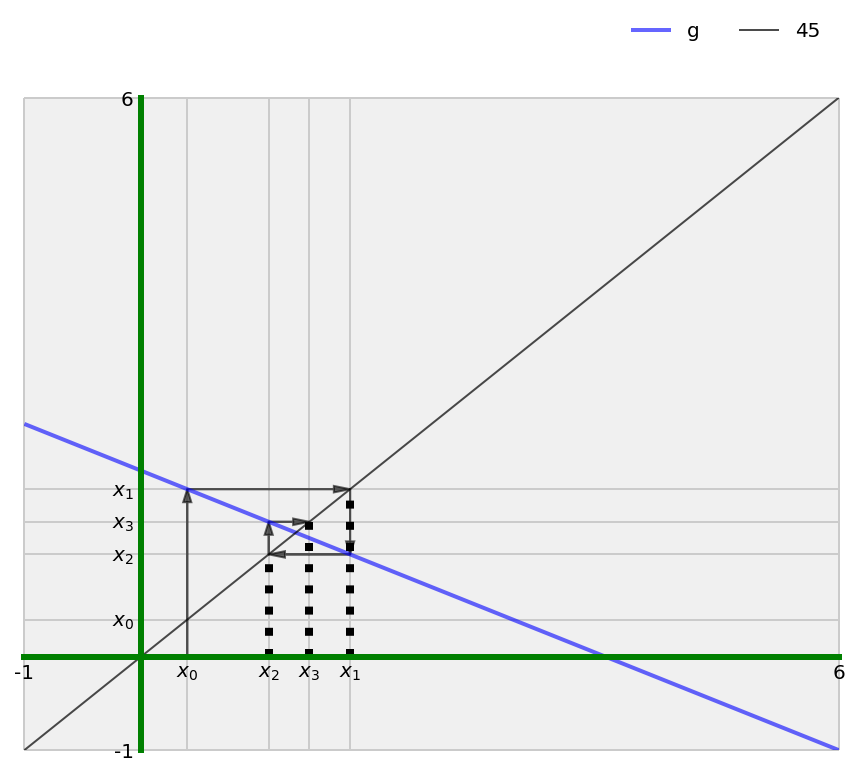

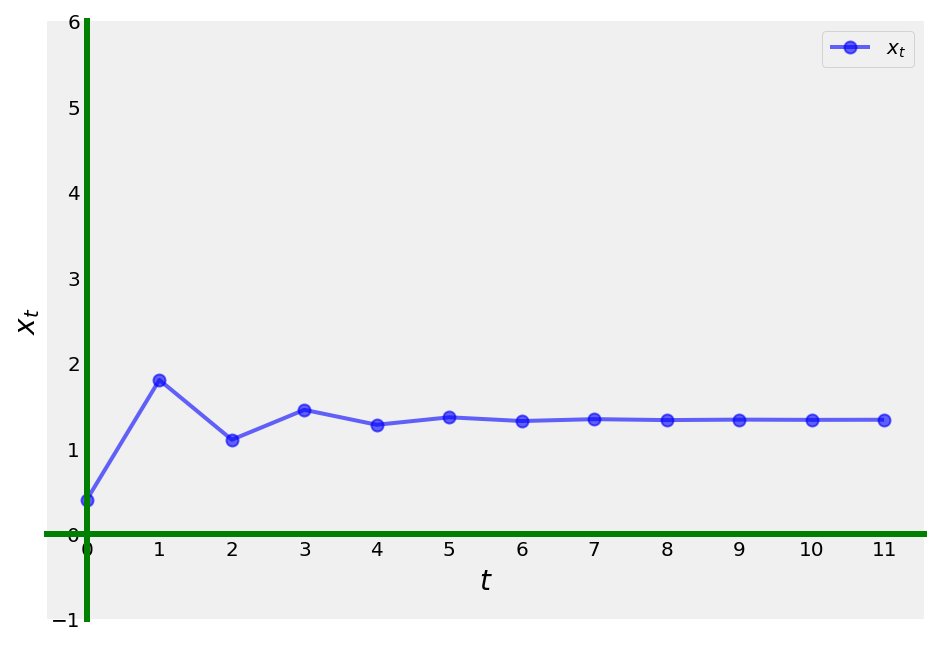

In [5]:

x0 = 0.4
num_arrows = 3
ts_length=12
xmin, xmax = -1, 6
g = lambda x: 2 - 0.5 * x
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### Diverge
x = 1 - 1.2 * x

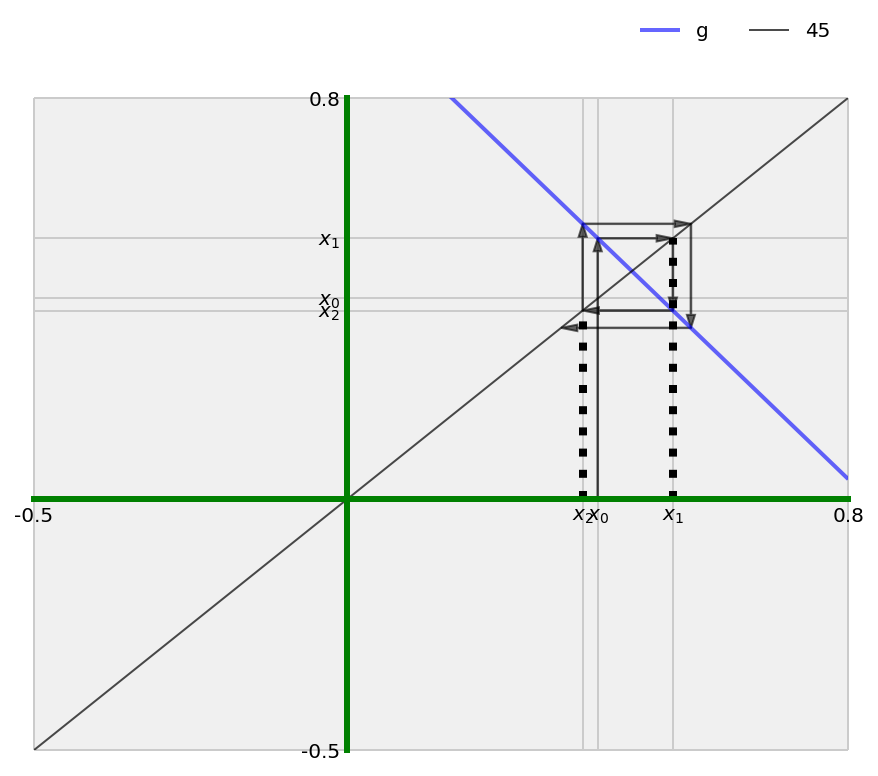

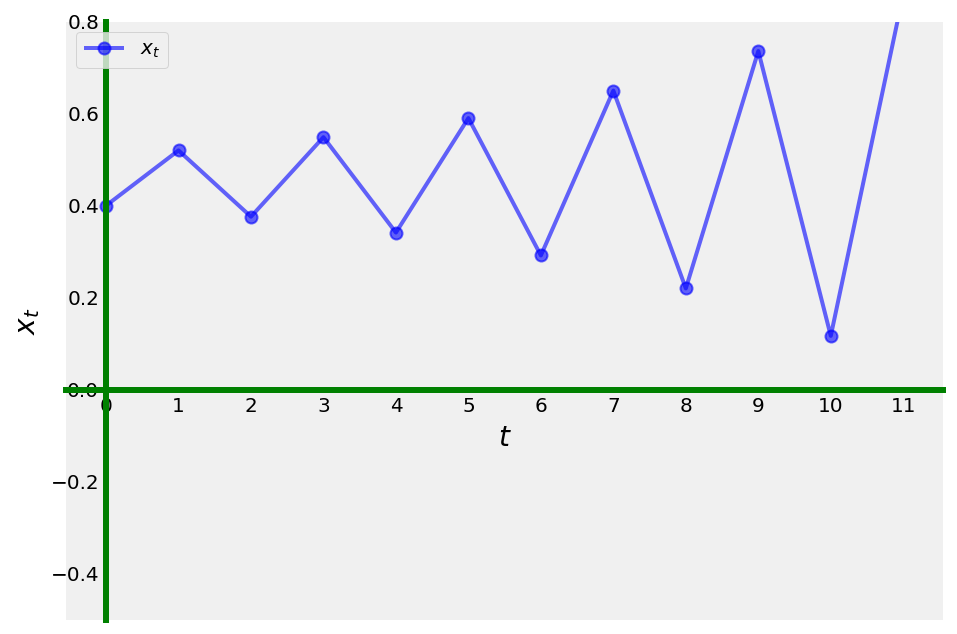

In [6]:
x0 = 0.4
num_arrows = 4
ts_length=12
xmin, xmax = -.5, .8
g = lambda x: 1 -1.2 * x
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### Nonlinear Difference Equation

x = 2.125 / (1 + x**(-4))

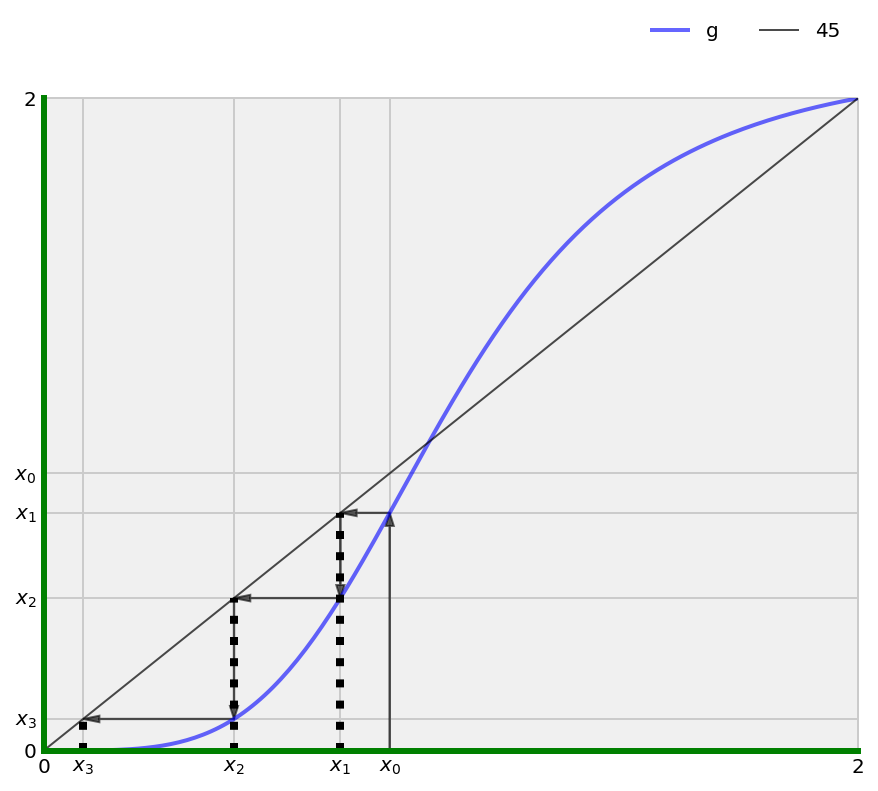

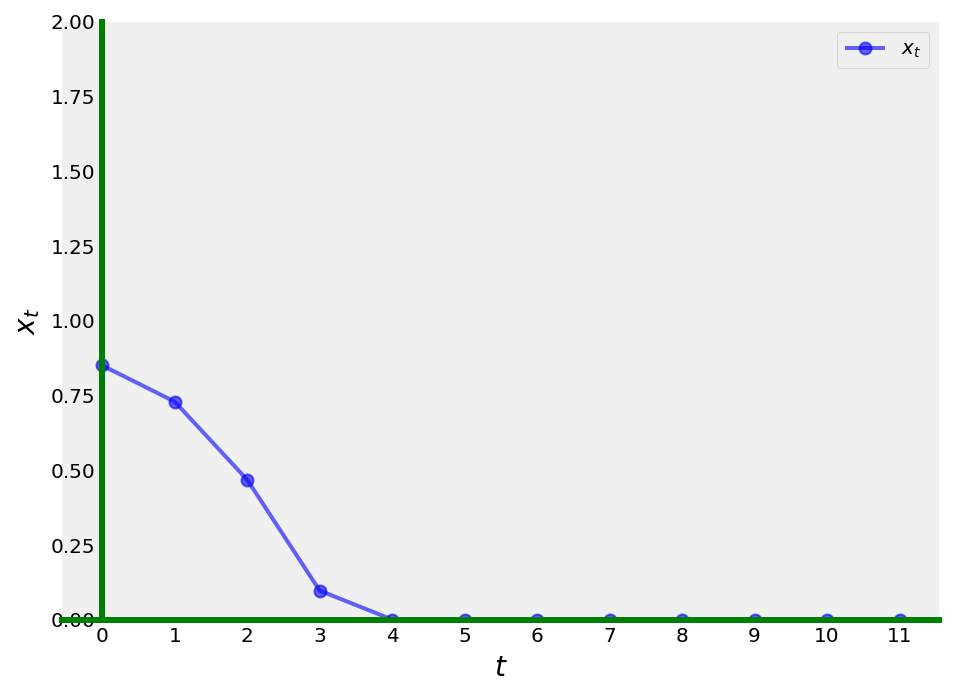

In [7]:

x0 = 0.85
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4)) 
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

#### Ininitial Value Matter

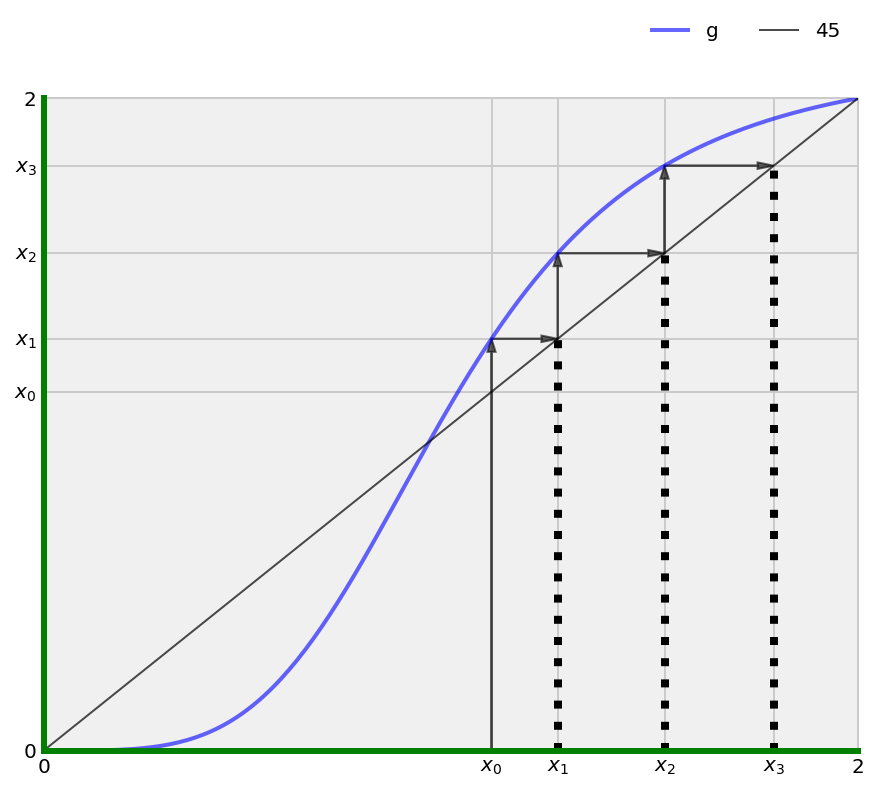

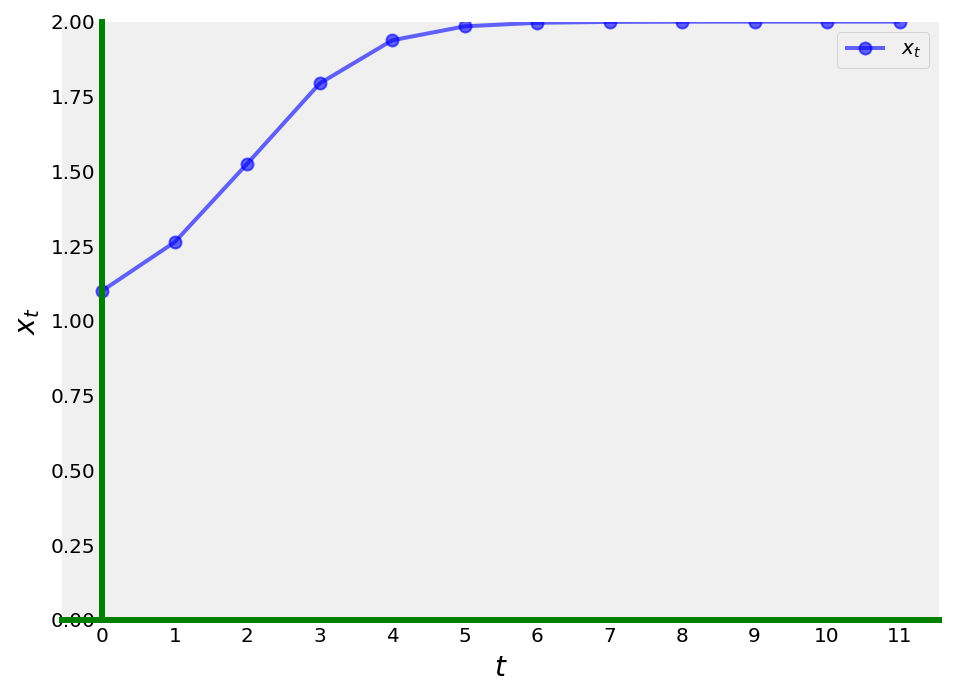

In [8]:
x0 = 1.1
num_arrows = 3
xmin, xmax = 0, 2
ts_length = 12
h = lambda x: 1 / (1 + x**(-4))
c = xmax / h(xmax)
g = lambda x: c / (1 + x**(-4))
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### Converge



A, s, alpha, delta = 2, 0.3, 0.3, 0.4


k = A * s * k**alpha + (1 - delta) * k

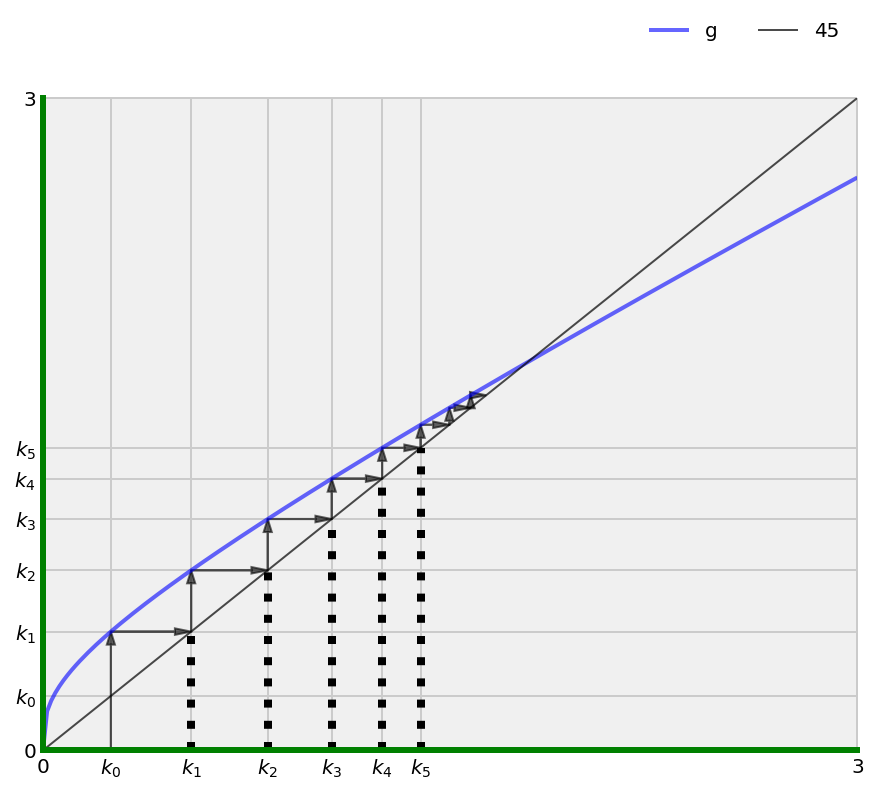

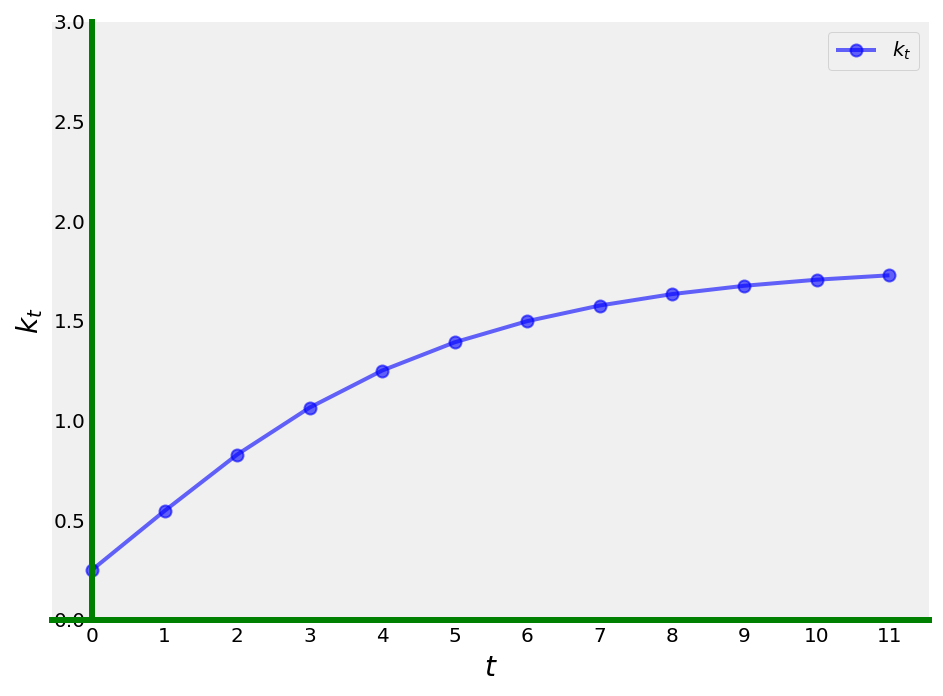

In [9]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 0.25
num_arrows = 8
ts_length = 12
xmin, xmax = 0, 3
g = lambda k: A * s * k**alpha + (1 - delta) * k
plot45(g, xmin, xmax, x0, num_arrows, var='k', show_num=6)
ts_plot(g, xmin, xmax, x0, ts_length, var='k')

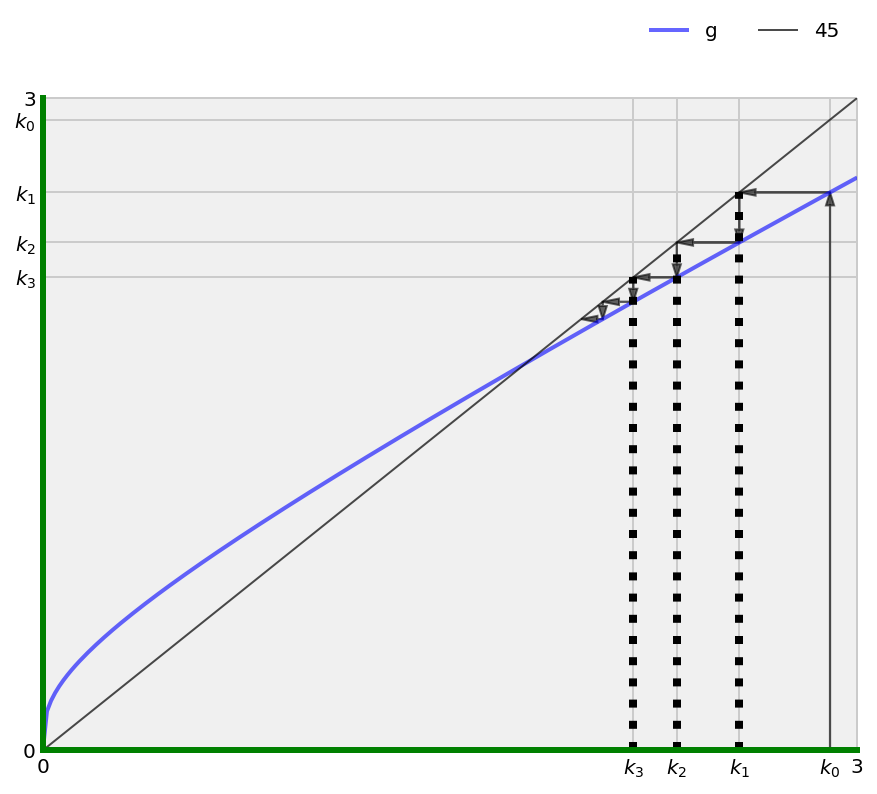

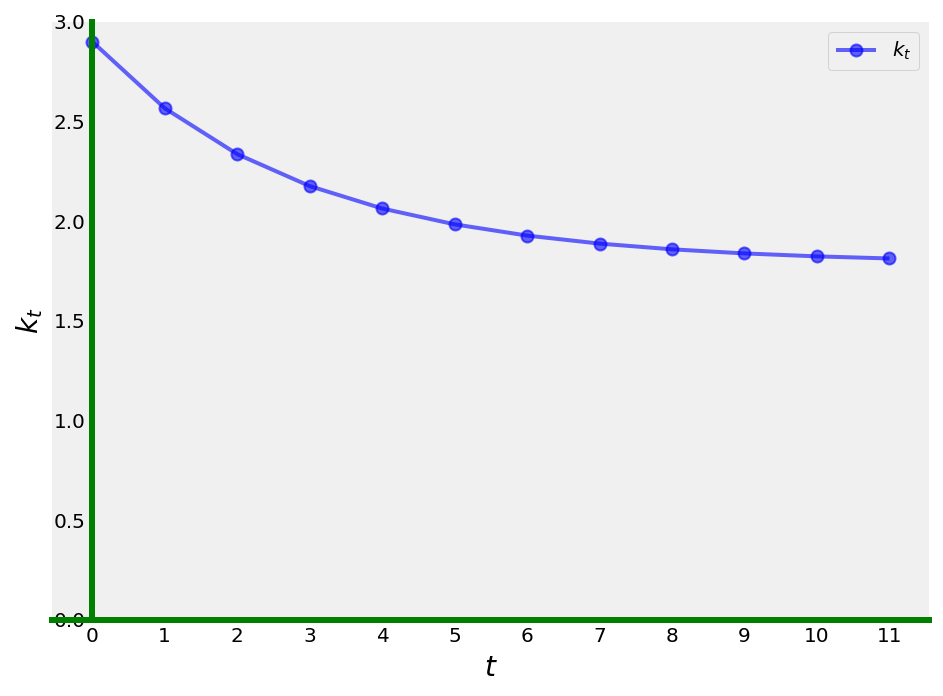

In [10]:
A, s, alpha, delta = 2, 0.3, 0.3, 0.4
x0 = 2.9
num_arrows = 5
ts_length = 12
xmin, xmax = 0, 3
g = lambda k: A * s * k**alpha + (1 - delta) * k
plot45(g, xmin, xmax, x0, num_arrows, var='k', show_num=4)
ts_plot(g, xmin, xmax, x0, ts_length, var='k')

### Logistics Growth of Resource (Nonlinear)
x =4  x  (1 - x)

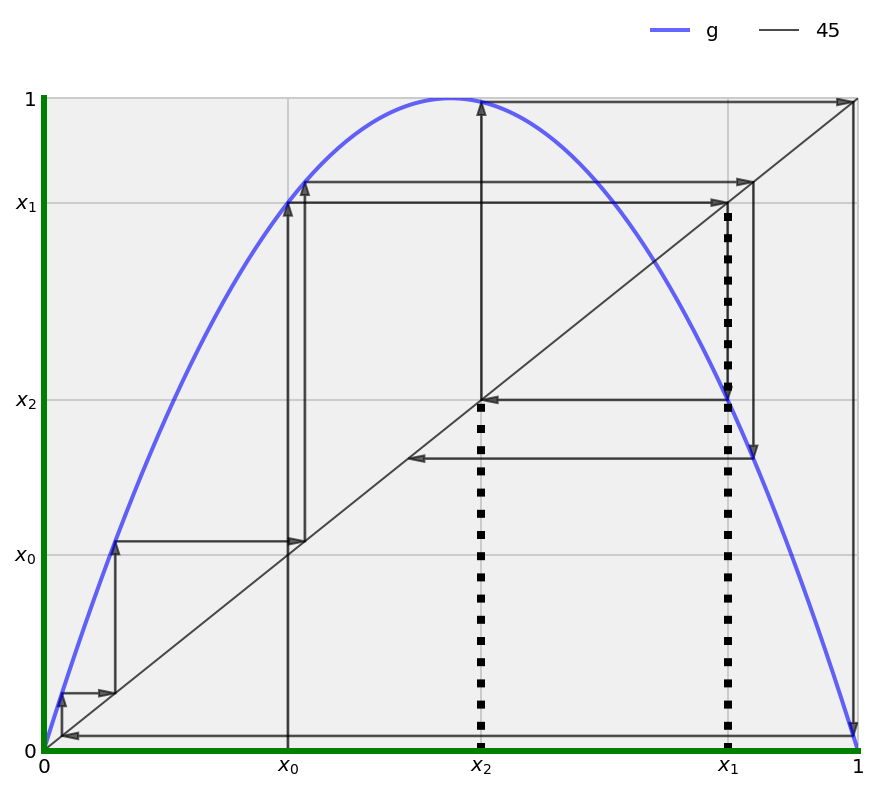

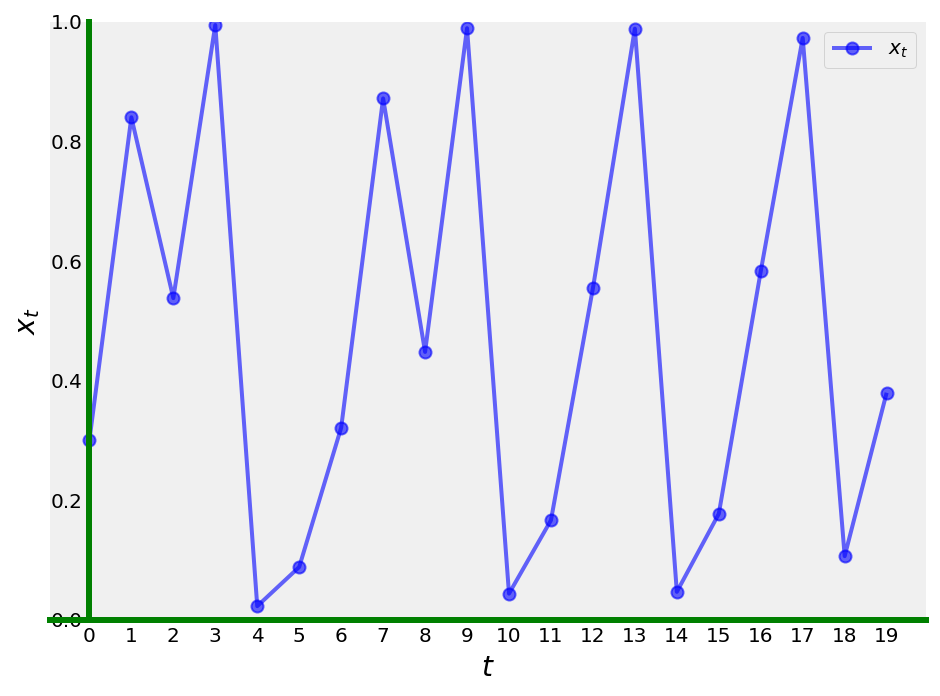

In [11]:
x0 = 0.3
num_arrows = 8
xmin, xmax = 0, 1
ts_length = 20
g = lambda x: 4 * x * (1 - x)
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

### Oscillation

Slope matters

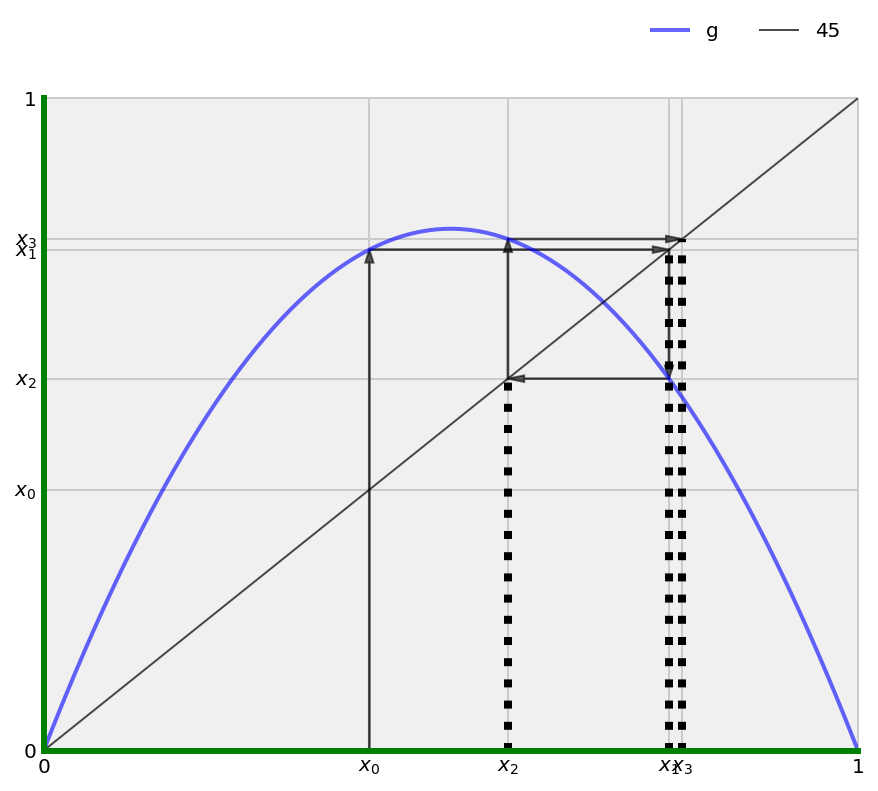

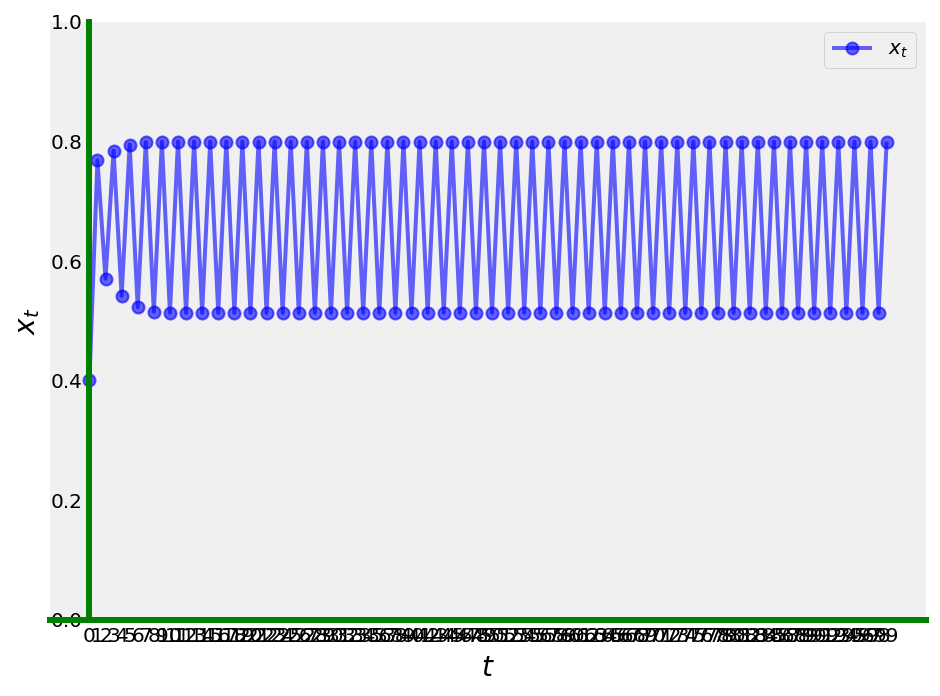

In [12]:
num_arrows = 3
xmin, xmax = 0, 1
ts_length = 100
r = 3.2
xstar1 = 0.8 
xstar2 = 0.5
x0 = 0.4
g = lambda x: r * x * (1 - x)
plot45(g, xmin, xmax, x0, num_arrows)
ts_plot(g, xmin, xmax, x0, ts_length)

In [ ]:
from IPython.core.display import HTML, Image
css_file = '../../custom.css'
HTML(open(css_file, 'r').read())

http://vknight.org/Computing_for_mathematics/LabSheets/Week_09/